## Notebook to preprocess all external data for each SA2 region
* Make sure to run datascrape.ipynb before running

In [4]:
import numpy as np
import pandas as pd
import geopandas as gpd
import sys
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import random 
from statsmodels.tsa.stattools import adfuller

In [60]:
## Population Data
## Population Projection Data:\n",
population_projection = pd.read_csv("../data/landing/yearly_pop_projection_perSA.csv")

In [61]:
# Filter for 'Persons' so we only get the total population for each region\,
df_persons = population_projection[population_projection['SEX'] == 'Persons']

# Pivot the DataFrame to get `SA2_NAME` as rows, `YEAR` as columns, and `Total` as values\n
df_pivot = df_persons.pivot_table(index='SA2_NAME', columns='YEAR', values='Total', aggfunc='sum')

# View the result
df_pivot.head()

YEAR,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032
SA2_NAME,,,,,,,,,,,,,,,,
Abbotsford,9450,10112,10779,11438,12083,12714,13327,13929,14513,15082,15634,16180,16720,17252,17777,18291
Airport West,8034,8145,8262,8378,8491,8605,8715,8825,8935,9041,9147,9255,9363,9470,9576,9680
Albert Park,16735,16979,17239,17499,17754,18000,18234,18449,18652,18839,19009,19179,19350,19518,19688,19854
Alexandra,6534,6589,6643,6694,6737,6779,6816,6850,6882,6907,6925,6940,6954,6963,6967,6969
Alfredton,12525,13166,13813,14454,15073,15688,16294,16896,17489,18056,18611,19166,19716,20262,20805,21343


In [2]:
# Read the GeoPackage
population_gdf = gpd.read_file("../data/population/population_extracted/32180_ERP_2023_SA2_GDA2020.gpkg")


In [3]:
# extract SA2 name and ERP (estimated residential population) for victoria only

population_gdf = population_gdf[population_gdf['State_name_2021'] == 'Victoria']

population_gdf = population_gdf[[ 'SA2_name_2021',
 'ERP_2006',
 'ERP_2007',
 'ERP_2008',
 'ERP_2009',
 'ERP_2010',
 'ERP_2011',
 'ERP_2012',
 'ERP_2013',
 'ERP_2014',
 'ERP_2015',
 'ERP_2016',
 'ERP_2017',
 'ERP_2018',
 'ERP_2019',
 'ERP_2020',
 'ERP_2021',
 'ERP_2022',
 'ERP_2023']]

In [4]:
population_df = pd.DataFrame(population_gdf).set_index('SA2_name_2021')
population_df.columns = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]

In [5]:
population_df

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
SA2_name_2021,,,,,,,,,,,,,,,,,,
Alfredton,6761.0,7034.0,7272.0,7614.0,7894.0,8452.0,9060.0,9714.0,10338.0,11039.0,11852,12649,13537,14434,15507,16841,18002,18997
Ballarat,12356.0,12408.0,12480.0,12476.0,12462.0,12365.0,12357.0,12352.0,12327.0,12300.0,12301,12266,12244,12320,12196,12071,11938,11809
Buninyong,6037.0,6131.0,6252.0,6431.0,6595.0,6725.0,6854.0,6984.0,7082.0,7191.0,7311,7409,7418,7458,7377,7229,7247,7323
Delacombe,5041.0,5206.0,5349.0,5557.0,5699.0,5838.0,6020.0,6267.0,6583.0,6846.0,7195,7622,8183,8890,9755,10648,11798,12869
Smythes Creek,3542.0,3594.0,3658.0,3714.0,3774.0,3819.0,3872.0,3914.0,3945.0,3966.0,3990,4004,4042,4112,4152,4211,4223,4268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Otway,3459.0,3489.0,3501.0,3490.0,3460.0,3420.0,3456.0,3497.0,3519.0,3538.0,3556,3635,3710,3802,3911,3979,3974,3983
Moyne - East,6652.0,6606.0,6631.0,6703.0,6739.0,6779.0,6764.0,6749.0,6734.0,6716.0,6709,6717,6746,6798,6883,6990,7046,7132
Moyne - West,8601.0,8694.0,8792.0,8878.0,8965.0,9024.0,9167.0,9300.0,9383.0,9467.0,9603,9686,9783,9845,9859,9967,10098,10148


In [7]:
## Homelessness

In [6]:
# must conda/pip install openpyxl

homelessness_df_21 = pd.read_excel('../data/homelessness/homelessness21.xlsx', sheet_name='Table_5.3')

In [7]:
homelessness_df_21 = homelessness_df_21.loc[775:1375]
homelessness_df_21 = homelessness_df_21[pd.notna(homelessness_df_21['Unnamed: 3'])]
homelessness_df_21 = homelessness_df_21.iloc[:, -2:]
homelessness_df_21.columns = ['SA2_name_2021', 'all_homeless_persons_2021']

In [8]:
homelessness_df_21

,SA2_name_2021,all_homeless_persons_2021
775,Buninyong,43
776,Delacombe,43
777,Smythes Creek,5
778,Wendouree - Miners Rest,93
779,Ballarat East - Warrenheip,148
...,...,...
1370,Otway,27
1372,Moyne - East,25
1373,Moyne - West,6
1374,Warrnambool - North,95


In [9]:
# must conda/pip install openpyxl

homelessness_df_16 = pd.read_excel('../data/homelessness/homelessness16.xlsx', sheet_name='Table_5.3')

In [10]:
homelessness_df_16 = homelessness_df_16.loc[707:1249]
homelessness_df_16 = homelessness_df_16[pd.notna(homelessness_df_16['Unnamed: 3'])]
homelessness_df_16 = homelessness_df_16.iloc[:, -2:]
homelessness_df_16.columns = ['SA2_name_2021', 'all_homeless_persons_2016']

In [11]:
homelessness_df_16

,SA2_name_2021,all_homeless_persons_2016
707,Alfredton,3
708,Ballarat,123
709,Ballarat - North,92
710,Ballarat - South,74
711,Buninyong,0
...,...,...
1244,Otway,3
1246,Moyne - East,6
1247,Moyne - West,16
1248,Warrnambool - North,87


In [12]:
# must conda/pip install openpyxl

homelessness_df_11 = pd.read_excel('../data/homelessness/homelessness11.xlsx', sheet_name='Table_1')

In [13]:
homelessness_df_11 = homelessness_df_11.loc[668:1180]
homelessness_df_11 = homelessness_df_11[pd.notna(homelessness_df_11['Unnamed: 3'])]
homelessness_df_11 = homelessness_df_11.iloc[:, -2:]
homelessness_df_11.columns = ['SA2_name_2021', 'all_homeless_persons_2011']

In [14]:
homelessness_df_11

,SA2_name_2021,all_homeless_persons_2011
668,Alfredton,10
669,Ballarat,97
670,Ballarat - North,84
671,Ballarat - South,128
672,Buninyong,3
...,...,...
1176,Moyne - East,0
1177,Moyne - West,3
1178,Otway,9
1179,Warrnambool - North,74


In [15]:
homelessness_df = homelessness_df_11.merge(homelessness_df_16, on='SA2_name_2021').merge(homelessness_df_21, on='SA2_name_2021')
homelessness_df = homelessness_df.set_index('SA2_name_2021')
homelessness_df.columns = [2011,2016,2021]
homelessness_df

,2011,2016,2021
SA2_name_2021,,,
Buninyong,3,0,43
Delacombe,33,38,43
Smythes Creek,0,0,5
Wendouree - Miners Rest,51,74,93
Creswick - Clunes,17,4,15
...,...,...,...
Moyne - East,0,6,25
Moyne - West,3,16,6
Otway,9,3,27


In [18]:
# socioeconomic

In [5]:
# must conda/pip install openpyxl

socioeconomic_df_21 = pd.read_excel('../data/socioeconomic/socioeconomic21.xlsx', sheet_name='Table 1')

In [6]:
socioeconomic_df_21 = socioeconomic_df_21.loc[634:1149]
socioeconomic_df_21 = socioeconomic_df_21.iloc[:, [1, 4]]
socioeconomic_df_21.columns = ['SA2_name_2021', 'Index of Relative Socio-economic Advantage and Disadvantage 2021']

In [7]:
socioeconomic_df_21

,SA2_name_2021,Index of Relative Socio-economic Advantage and Disadvantage 2021
634,Alfredton,1011
635,Ballarat,1040
636,Buninyong,1040
637,Delacombe,947
638,Smythes Creek,1005
...,...,...
1145,Otway,977
1146,Moyne - East,986
1147,Moyne - West,1005
1148,Warrnambool - North,956


In [8]:
# must conda/pip install xlrd

socioeconomic_df_16 = pd.read_excel('../data/socioeconomic/socioeconomic16.xlsx', sheet_name='Table 1')

In [9]:
socioeconomic_df_16 = socioeconomic_df_16.loc[565:1019]
socioeconomic_df_16 = socioeconomic_df_16.iloc[:, [1, 4]]
socioeconomic_df_16.columns = ['SA2_name_2021', 'Index of Relative Socio-economic Advantage and Disadvantage 2016']

In [10]:
socioeconomic_df_16

,SA2_name_2021,Index of Relative Socio-economic Advantage and Disadvantage 2016
565,Alfredton,1025
566,Ballarat,1037
567,Ballarat - North,983
568,Ballarat - South,912
569,Buninyong,1051
...,...,...
1015,Otway,976
1016,Moyne - East,995
1017,Moyne - West,998
1018,Warrnambool - North,958


In [11]:
# must conda/pip install xlrd

socioeconomic_df_11 = pd.read_excel('../data/socioeconomic/socioeconomic11.xlsx', sheet_name='Table 2')

In [12]:
socioeconomic_df_11 = socioeconomic_df_11.loc[1459:1882]
socioeconomic_df_11 = socioeconomic_df_11.iloc[:, [1, 3]]
socioeconomic_df_11.columns = ['SA2_name_2021', 'Index of Relative Socio-economic Advantage and Disadvantage 2011']

In [13]:
socioeconomic_df_11

,SA2_name_2021,Index of Relative Socio-economic Advantage and Disadvantage 2011
1459,Alfredton,1036.118125
1460,Ballarat,1023.752255
1461,Ballarat - North,982.705859
1462,Ballarat - South,924.379674
1463,Buninyong,1064.12227
...,...,...
1878,Moyne - East,999.233
1879,Moyne - West,1007.253286
1880,Otway,976.754857
1881,Warrnambool - North,965.073742


In [38]:
socioeconomic_df = socioeconomic_df_11.merge(socioeconomic_df_16, on='SA2_name_2021').merge(socioeconomic_df_21, on='SA2_name_2021')

In [39]:
socioeconomic_df.head()
socioeconomic_df.rename(columns={
    'Index of Relative Socio-economic Advantage and Disadvantage 2011': '2011',
    'Index of Relative Socio-economic Advantage and Disadvantage 2016': '2016',
    'Index of Relative Socio-economic Advantage and Disadvantage 2021': '2021'
}, inplace=True)
socioeconomic_df.head()

,SA2_name_2021,2011,2016,2021
0,Alfredton,1036.118125,1025,1011
1,Ballarat,1023.752255,1037,1040
2,Buninyong,1064.12227,1051,1040
3,Delacombe,947.363463,940,947
4,Smythes Creek,1022.078563,1012,1005


## TESTING PROJECTIONS

In [16]:
from statsmodels.api import OLS

## LINEAR INTERPOLATION

In [29]:
# Prepare to store predictions including all years from 2011 to 2030
all_years = np.arange(2011, 2031)

# Initialize a list for predictions
predictions = []

for index, row in socioeconomic_df.iterrows():
    # Prepare the data for regression
    years = np.array([2011, 2016, 2021])
    values = np.array([row['2011'], row['2016'], row['2021']])
    
    # Fit the model
    model = OLS(values, np.vstack([years, np.ones(len(years))]).T).fit()
    
    # Predict values for all years between 2011 and 2030
    future_values = model.predict(np.vstack([all_years, np.ones(len(all_years))]).T)

    # Store predictions
    for year, value in zip(all_years, future_values):
        predictions.append({'SA2_name_2021': row['SA2_name_2021'], 'Year': year, 'Predicted_Value': value})

# Create a DataFrame from predictions
predictions_df = pd.DataFrame(predictions)


In [30]:
# Pivot the DataFrame
pivot_df = predictions_df.pivot(index='Year', columns='SA2_name_2021', values='Predicted_Value')

# Reset the index
pivot_df.reset_index(inplace=True)

# Rename the 'Year' column to just 'Year' without an index name
pivot_df.columns.name = None

# Reorder columns to have 'Year' as a regular column
final_df = pivot_df.rename_axis(None, axis=1)

final_df.head(20)

,Year,Abbotsford,Airport West,Albert Park,Alexandra,Alfredton,Alphington - Fairfield,Altona,Altona Meadows,Altona North,...,Wonthaggi - Inverloch,Woodend,Yackandandah,Yallourn North - Glengarry,Yarra Valley,Yarram,Yarraville,Yarrawonga,Yarriambiack,Yea
0,2011,1075.930444,993.741422,1112.367671,963.940081,1036.598438,1067.598505,1009.483152,966.644086,918.138775,...,946.107238,1056.090190,1032.817394,983.663224,955.631788,936.666959,1056.420804,942.795862,941.439063,973.124662
1,2012,1081.538791,996.292451,1114.883550,962.707271,1034.086625,1071.806684,1013.425174,966.646796,925.722122,...,946.014370,1056.999367,1032.479307,980.103637,955.475974,934.626924,1061.930307,941.700358,939.466375,972.469702
2,2013,1087.147137,998.843480,1117.399430,961.474462,1031.574813,1076.014864,1017.367196,966.649505,933.305469,...,945.921501,1057.908544,1032.141219,976.544050,955.320159,932.586889,1067.439811,940.604855,937.493688,971.814743
3,2014,1092.755484,1001.394510,1119.915309,960.241652,1029.063000,1080.223043,1021.309218,966.652215,940.888816,...,945.828632,1058.817721,1031.803132,972.984463,955.164345,930.546854,1072.949314,939.509351,935.521000,971.159784
4,2015,1098.363831,1003.945539,1122.431189,959.008842,1026.551188,1084.431223,1025.251239,966.654925,948.472163,...,945.735764,1059.726899,1031.465045,969.424876,955.008530,928.506819,1078.458818,938.413848,933.548313,970.504824
5,2016,1103.972178,1006.496569,1124.947068,957.776032,1024.039375,1088.639402,1029.193261,966.657634,956.055510,...,945.642895,1060.636076,1031.126958,965.865290,954.852715,926.466784,1083.968321,937.318345,931.575625,969.849865
6,2017,1109.580524,1009.047598,1127.462948,956.543223,1021.527563,1092.847581,1033.135283,966.660344,963.638857,...,945.550027,1061.545253,1030.788870,962.305703,954.696901,924.426749,1089.477825,936.222841,929.602938,969.194905
7,2018,1115.188871,1011.598627,1129.978827,955.310413,1019.015750,1097.055761,1037.077304,966.663054,971.222204,...,945.457158,1062.454430,1030.450783,958.746116,954.541086,922.386714,1094.987329,935.127338,927.630250,968.539946
8,2019,1120.797218,1014.149657,1132.494707,954.077603,1016.503938,1101.263940,1041.019326,966.665763,978.805551,...,945.364290,1063.363608,1030.112696,955.186529,954.385272,920.346678,1100.496832,934.031834,925.657563,967.884986
9,2020,1126.405564,1016.700686,1135.010586,952.844794,1013.992125,1105.472120,1044.961348,966.668473,986.388898,...,945.271421,1064.272785,1029.774608,951.626942,954.229457,918.306643,1106.006336,932.936331,923.684875,967.230027


<Figure size 1000x600 with 0 Axes>

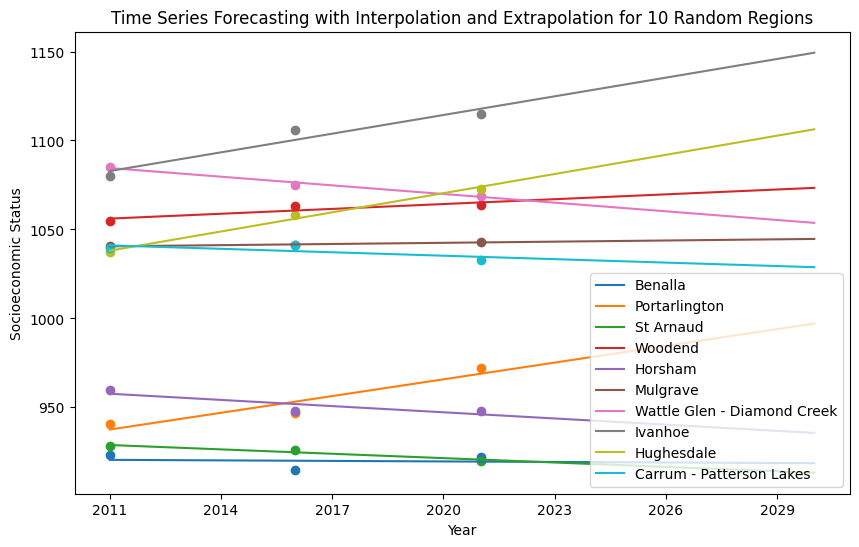

In [31]:
# Randomly select 10 regions to plot
random_regions = random.sample(pivot_df.columns[1:].tolist(), 10)  # Exclude the 'Year' column

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the results for the 10 random regions and show the legend for the line plots
pivot_df.plot(x='Year', y=random_regions, figsize=(10, 6), legend=True)

# Add scatter points for the original values in 2011, 2016, and 2021
for region in random_regions:
    # Get the original values for the selected region
    original_values = socioeconomic_df.loc[socioeconomic_df['SA2_name_2021'] == region, ['2011', '2016', '2021']].values.flatten()
    
    # Scatter plot for the original values without adding to the legend
    plt.scatter([2011, 2016, 2021], original_values, marker='o', label='_nolegend_')

# Title and labels
plt.title('Time Series Forecasting with Interpolation and Extrapolation for 10 Random Regions')
plt.xlabel('Year')
plt.ylabel('Socioeconomic Status')

# Set x-ticks to show every three years
plt.xticks(range(2011, 2030, 3))  # Adjust range to include years every 3 years

# Show the plot
plt.show()


## NON LINEAR INTERPOLATION

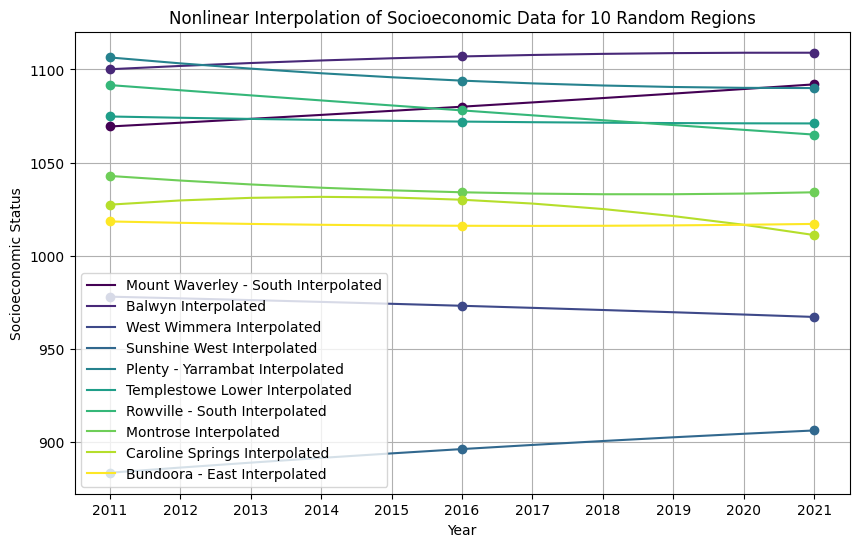

In [45]:
from scipy.interpolate import CubicSpline

# Define the years and the corresponding values for interpolation
years = np.array([2011, 2016, 2021])
interpolated_data = []

# Perform interpolation for all regions
for index, row in socioeconomic_df.iterrows():
    values = row[1:].values  # Get the values for the region
    cs = CubicSpline(years, values)  # Create a cubic spline interpolation function
    
    # Generate interpolated values for the years 2011 to 2021
    interpolated_years = np.arange(2011, 2022, 1)
    interpolated_values = cs(interpolated_years)  # Evaluate the spline function
    
    # Store the results
    interpolated_data.append(interpolated_values)

# Convert interpolated data to a DataFrame
interpolated_df = pd.DataFrame(interpolated_data, columns=interpolated_years, index=socioeconomic_df['SA2_name_2021'])

# Randomly sample 10 regions for plotting
sampled_regions = socioeconomic_df.sample(n=10, random_state=42)

# Create a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(sampled_regions)))

# Plotting the original and interpolated data for the sample of 10 regions
plt.figure(figsize=(10, 6))
for color, (index, row) in zip(colors, sampled_regions.iterrows()):
    # Plot interpolated data
    plt.plot(interpolated_years, interpolated_df.loc[row['SA2_name_2021']], color=color, label=row['SA2_name_2021'] + ' Interpolated')
    # Plot original data points
    plt.plot(years, row[1:], 'o', color=color)  # Use the same color for the dots

plt.title('Nonlinear Interpolation of Socioeconomic Data for 10 Random Regions')
plt.xlabel('Year')
plt.ylabel('Socioeconomic Status')
plt.xticks(np.arange(2011, 2022, 1))
plt.legend()
plt.grid(True)
plt.show()


next we extrapolate

In [30]:
## inflation

In [31]:
# lets extract housing CPI index, as well as overall CPI with housing removed as a measure of all other inflation
# this will be best for analysis to keep both variables as independent as possible

In [27]:
housing_cpi_df = pd.read_excel('../data/inflation/inflation.xlsx', sheet_name='Data1')

In [28]:
excluding_housing_cpi_df = pd.read_excel('../data/inflation/inflation.xlsx', sheet_name='Data2')

In [29]:
housing_cpi_df = housing_cpi_df[['Unnamed: 0','Index Numbers ;  Housing ;  Melbourne ;']]

In [30]:
excluding_housing_cpi_df = excluding_housing_cpi_df[['Unnamed: 0','Index Numbers ;  All groups CPI excluding Housing ;  Melbourne ;']]

In [31]:
housing_cpi_df = housing_cpi_df.rename(columns={'Unnamed: 0': "quarter"})

In [32]:
inflation_df = pd.concat([housing_cpi_df,excluding_housing_cpi_df],axis=1).drop('Unnamed: 0', axis=1).dropna().iloc[9:].rename(columns={'Index Numbers ;  Housing ;  Melbourne ;': "housing_index", 'Index Numbers ;  All groups CPI excluding Housing ;  Melbourne ;': 'CPI_without_housing'})

In [33]:
inflation_df['Year'] = pd.to_datetime(inflation_df['quarter']).dt.year

In [34]:
# take average across each year
yearly_avg = inflation_df.groupby('Year')[['housing_index', 'CPI_without_housing']].mean()

# Transpose the DataFrame so that 'Year' becomes the columns, and we have rows for housing_index and CPI_without_housing
new_inflation_df = yearly_avg.T.loc[:, 2006:2024]

In [35]:
new_inflation_df

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
housing_index,76.4,78.8,83.775,88.075,94.175,98.75,101.625,106.825,109.35,112.275,115.025,119.4,123.95,124.4,125.8,125.575,136.4,145.775,149.75
CPI_without_housing,88.8,90.775,94.125,94.6,96.55,99.525,100.775,102.475,104.9,105.95,107.2,109.15,111.125,113.2,114.675,118.225,125.175,131.175,134.55


In [41]:
# lets look at population distributions

In [36]:
pop_dist_df = pd.read_excel('../data/population_dist/population_dist.xlsx', sheet_name='Table 1')

In [37]:
pop_dist_df = pop_dist_df.loc[9879:14576]
pop_dist_df = pop_dist_df.iloc[:, [1, 2, 4, 9, 127, 131, 142, 156]]
pop_dist_df.columns = ['SA2_name_2021', 'Year', 'Population Density', 'Median Age', 'Overseas Arrivals', 'Percentage Aboriginal and Torres Straight Islander', 'Percentage Overseas Born', 'Percentage Australian Citizen']
# population density in persons/km^2

In [38]:
pop_dist_df

,SA2_name_2021,Year,Population Density,Median Age,Overseas Arrivals,Percentage Aboriginal and Torres Straight Islander,Percentage Overseas Born,Percentage Australian Citizen
9879,Alfredton,2011,-,-,-,0.8,-,3.9
9880,Alfredton,2016,-,-,-,0.8,12.3,4.8
9881,Alfredton,2017,-,-,-,-,-,-
9882,Alfredton,2018,256.8,33.1,-,-,-,-
9883,Alfredton,2019,273.8,33,-,-,-,-
...,...,...,...,...,...,...,...,...
14572,Warrnambool - South,2019,110.4,42.3,-,-,-,-
14573,Warrnambool - South,2020,111,43.1,-,-,-,-
14574,Warrnambool - South,2021,110.6,44.2,-,1.8,10.8,5.5
14575,Warrnambool - South,2022,110.8,44.6,191,-,-,-


In [39]:
population_density_df = pop_dist_df.pivot(index='SA2_name_2021', columns='Year', values='Population Density')
median_age_df = pop_dist_df.pivot(index='SA2_name_2021', columns='Year', values='Median Age')
overseas_arrivals_df = pop_dist_df.pivot(index='SA2_name_2021', columns='Year', values='Overseas Arrivals')
percentage_aboriginal_torres_straight_df = pop_dist_df.pivot(index='SA2_name_2021', columns='Year', values='Percentage Aboriginal and Torres Straight Islander')
percentage_overseas_born_df = pop_dist_df.pivot(index='SA2_name_2021', columns='Year', values='Percentage Overseas Born')
percentage_australian_citizen_df = pop_dist_df.pivot(index='SA2_name_2021', columns='Year', values='Percentage Australian Citizen')

In [40]:
percentage_australian_citizen_df

Year,2011,2016,2017,2018,2019,2020,2021,2022,2023
SA2_name_2021,,,,,,,,,
Abbotsford,11.8,9.5,-,-,-,-,5.4,-,-
Airport West,4.8,6,-,-,-,-,2.4,-,-
Albert Park,7,8.7,-,-,-,-,4.2,-,-
Alexandra,4.8,8.1,-,-,-,-,5.8,-,-
Alfredton,3.9,4.8,-,-,-,-,2.9,-,-
...,...,...,...,...,...,...,...,...,...
Yarram,4.7,8.3,-,-,-,-,7.5,-,-
Yarraville,5,6.4,-,-,-,-,3.4,-,-
Yarrawonga,8.7,9.1,-,-,-,-,5.3,-,-


In [47]:
# business data

In [42]:
business_df = pd.read_excel('../data/business/business.xlsx', sheet_name='Table 1')

In [43]:
business_df = business_df.loc[9879:14576]
business_df = business_df.iloc[:, [1, 2, 7]]
business_df.columns = ['SA2_name_2021', 'Year', 'Total Number of Businesses']

In [44]:
business_df = business_df.pivot(index='SA2_name_2021', columns='Year', values='Total Number of Businesses')

In [45]:
business_df

Year,2011,2016,2017,2018,2019,2020,2021,2022,2023
SA2_name_2021,,,,,,,,,
Abbotsford,-,-,-,-,1587,1584,1625,1723,1738
Airport West,-,-,-,-,803,848,881,975,968
Albert Park,-,-,-,-,4757,4934,5116,5247,5425
Alexandra,-,-,-,-,777,793,828,859,855
Alfredton,-,-,-,-,819,872,961,1149,1215
...,...,...,...,...,...,...,...,...,...
Yarram,-,-,-,-,589,578,590,614,624
Yarraville,-,-,-,-,1306,1345,1418,1478,1475
Yarrawonga,-,-,-,-,600,601,633,698,719


In [52]:
# income data

In [47]:
income_df = pd.read_excel('../data/income/income.xlsx', sheet_name='Table 1')

In [48]:
income_df = income_df.loc[8782:12957]
income_df = income_df.iloc[:, [1, 2, 30]]
income_df.columns = ['SA2_name_2021', 'Year', 'Median Total Income']

In [49]:
income_df = income_df.pivot(index='SA2_name_2021', columns='Year', values='Median Total Income')

In [50]:
income_df

Year,2011,2016,2017,2018,2019,2020,2021,2022
SA2_name_2021,,,,,,,,
Abbotsford,-,57501,58359,61476,64090,67457,-,-
Airport West,-,52329,53575,55912,58506,60083,-,-
Albert Park,-,67627,66160,66627,67518,68933,-,-
Alexandra,-,35244,37052,37890,39452,40199,-,-
Alfredton,-,49385,50845,52448,53932,55204,-,-
...,...,...,...,...,...,...,...,...
Yarram,-,36367,35388,38003,37232,38845,-,-
Yarraville,-,61872,64295,66233,69410,71512,-,-
Yarrawonga,-,38477,38835,40572,41980,43654,-,-


In [57]:
# unemployment data

In [51]:
unemployment_df = pd.read_excel('../data/unemployment/unemployment.xlsx', sheet_name='Table 1')

In [52]:
unemployment_df = unemployment_df.loc[8782:12957]
unemployment_df = unemployment_df.iloc[:, [1, 2, 77]]
unemployment_df.columns = ['SA2_name_2021', 'Year', 'Unemployment Rate']

In [53]:
unemployment_df = unemployment_df.pivot(index='SA2_name_2021', columns='Year', values='Unemployment Rate')

In [54]:
unemployment_df

Year,2011,2016,2017,2018,2019,2020,2021,2022
SA2_name_2021,,,,,,,,
Abbotsford,4.6,5.4,-,-,-,-,4,-
Airport West,4.5,4.8,-,-,-,-,4.4,-
Albert Park,3.9,4.9,-,-,-,-,4.2,-
Alexandra,4.2,5,-,-,-,-,3.4,-
Alfredton,4.2,5.1,-,-,-,-,3.7,-
...,...,...,...,...,...,...,...,...
Yarram,4.7,6.7,-,-,-,-,5.9,-
Yarraville,4.2,5.2,-,-,-,-,3.9,-
Yarrawonga,4.4,5.4,-,-,-,-,2.8,-


In [62]:
# community data

In [55]:
community_df = pd.read_excel('../data/community/community.xlsx', sheet_name='Table 1')

In [56]:
community_df = community_df.loc[8782:12957]
community_df = community_df.iloc[:, [1, 2, 29, 49, 75]]
community_df.columns = ['SA2_name_2021', 'Year', 'Average Household Size', 'Median Weekly Rent', 'Percentage Rental Properties']

In [57]:
community_df

,SA2_name_2021,Year,Average Household Size,Median Weekly Rent,Percentage Rental Properties
8782,Alfredton,2011,2.8,250,19.8
8783,Alfredton,2016,2.8,311,25.6
8784,Alfredton,2017,-,-,-
8785,Alfredton,2018,-,-,-
8786,Alfredton,2019,-,-,-
...,...,...,...,...,...
12953,Warrnambool - South,2018,-,-,-
12954,Warrnambool - South,2019,-,-,-
12955,Warrnambool - South,2020,-,-,-
12956,Warrnambool - South,2021,2.2,287,29.8


In [58]:
ave_household_size_df = community_df.pivot(index='SA2_name_2021', columns='Year', values='Average Household Size')
median_rent_df = community_df.pivot(index='SA2_name_2021', columns='Year', values='Median Weekly Rent')
percentage_rentals_df = community_df.pivot(index='SA2_name_2021', columns='Year', values='Percentage Rental Properties')

In [59]:
percentage_rentals_df

Year,2011,2016,2017,2018,2019,2020,2021,2022
SA2_name_2021,,,,,,,,
Abbotsford,40.5,57.2,-,-,-,-,55.4,-
Airport West,21.2,24.6,-,-,-,-,28,-
Albert Park,42.2,42,-,-,-,-,43.6,-
Alexandra,18.8,17.7,-,-,-,-,17.7,-
Alfredton,19.8,25.6,-,-,-,-,28.2,-
...,...,...,...,...,...,...,...,...
Yarram,17.8,18.3,-,-,-,-,15.3,-
Yarraville,30.7,32.5,-,-,-,-,33.2,-
Yarrawonga,24.1,25.1,-,-,-,-,23.2,-
